# Experiment 6
Write a program to implement Linear Regression using any appropriate dataset (**Dataset used:** House Prices Prediction).

**Submitted By:** Ramansh Grover (2K18/CO/281)

In [1]:
import io
import base64
from IPython.display import HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

In [2]:
data = pd.read_csv('./data/house-prices-advanced-regression-techniques/train.csv')
data.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
921    922          90       RL         67.0     8777   Pave   NaN      Reg   
93      94         190  C (all)         60.0     7200   Pave   NaN      Reg   
620    621          30       RL         45.0     8248   Pave  Grvl      Reg   
720    721         120       RL          NaN     6563   Pave   NaN      IR1   
1332  1333          20       RL         67.0     8877   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
921          Lvl    AllPub    ...            0    NaN  GdPrv         NaN   
93           Lvl    AllPub    ...            0    NaN    NaN         NaN   
620          Lvl    AllPub    ...            0    NaN    NaN         NaN   
720          Low    AllPub    ...            0    NaN    NaN         NaN   
1332         Lvl    AllPub    ...            0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
921        0      9   2008        WD         Normal     145900  
93         0     11   2007        WD         Normal     133900  
620        0      9   2008        WD         Normal      67000  
720        0     12   2006        WD         Normal     275000  
1332       0      5   2009        WD         Normal     100000  

[5 rows x 81 columns]

In [3]:
data.describe() # null / empty values present

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [4]:
numerical_features = data.describe().columns.tolist()
numerical_data = data[numerical_features].dropna().reset_index(drop=True) # numerical (and continuous) features without NULL values

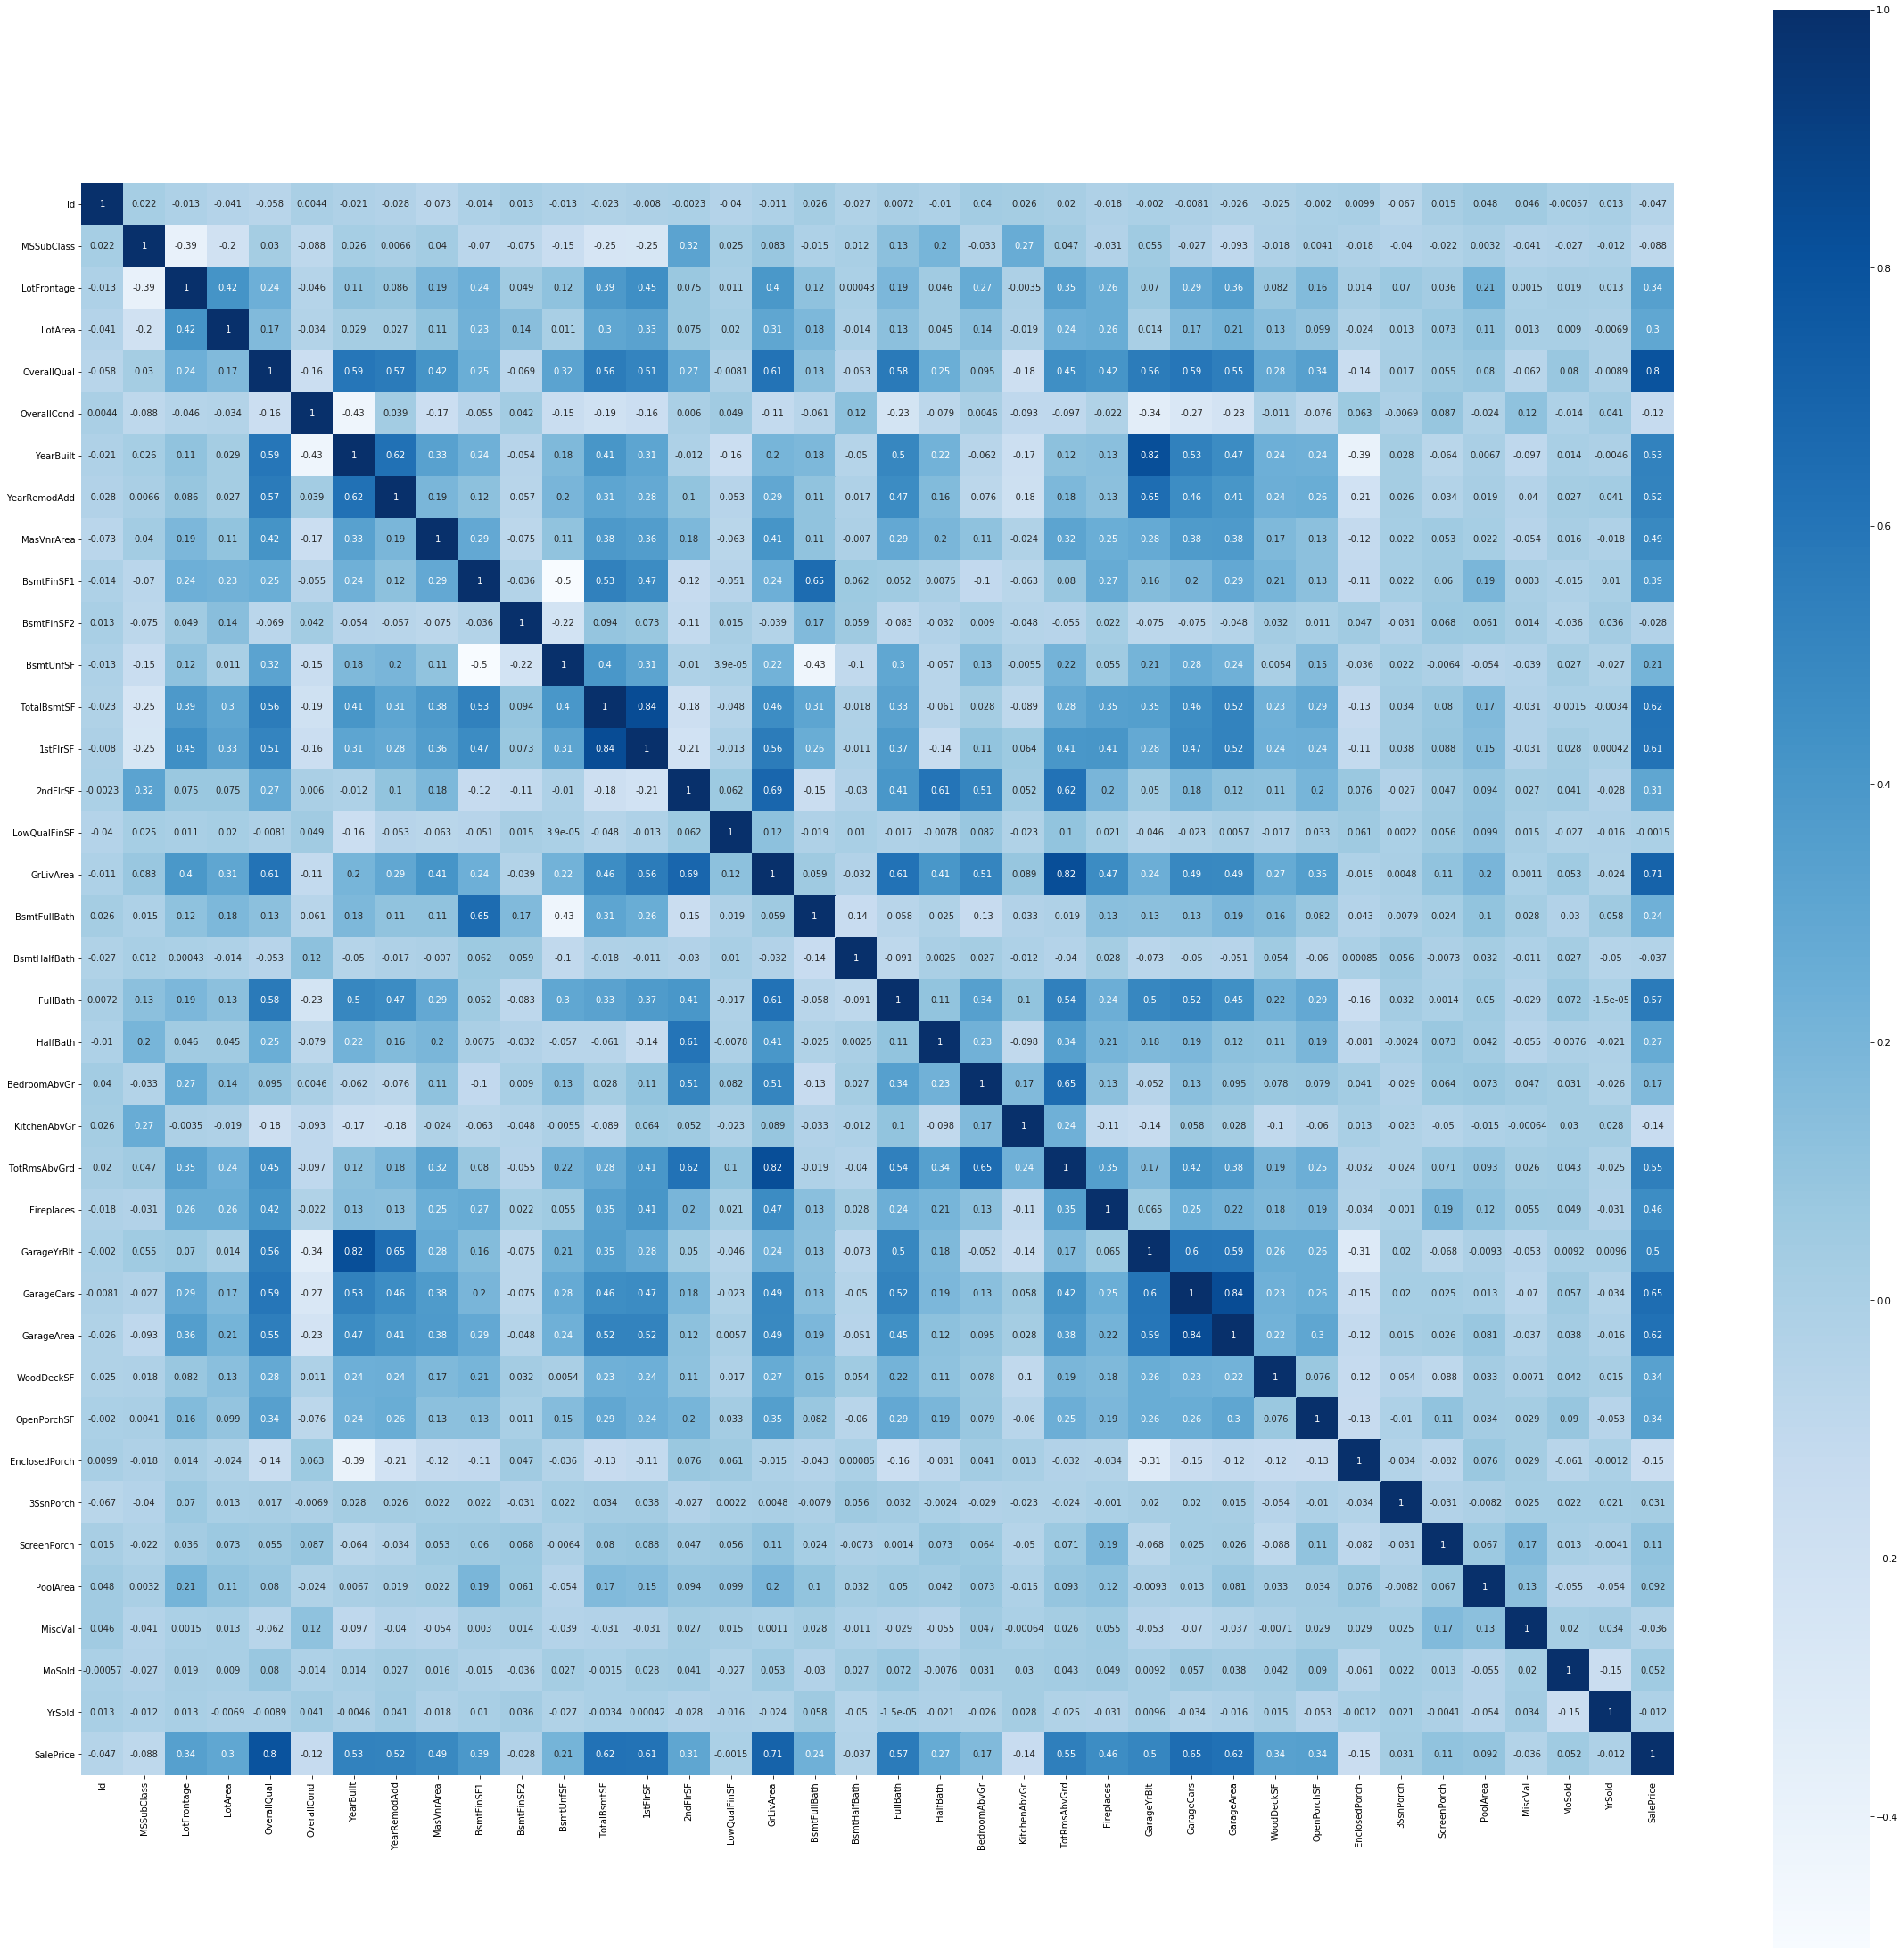

In [5]:
# CORRELATION BETWEEN NUMERICAL FEATURES
correlation = numerical_data.corr()
fig = plt.subplots(figsize=(40, 40))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues')

In [6]:
x = data['GrLivArea']              # From the plot above, I picked Living Area as the Independent Variable.
y = data['SalePrice']              # Dependent Variable

x = (x - x.mean()) / x.std()       # normalize 'x'
x = np.c_[np.ones(x.shape[0]), x]  # initialize a column of 1's for gradient descent

## Gradient Descent

The hypothesis,
\begin{equation*}
h_θ(x) = θ_0 + θ_1x
\end{equation*}

For every data point $i$, given $y$ as the original value, Mean Square Error (Cost Function) is defined as: 
\begin{equation*}
\frac{1}{2m} \sum_{i=1}^m (h_θ(x^i))-y^i)^2
\end{equation*}

In [7]:
# INIT
alpha = 0.01              # Step size
iterations = 2000         # No. of iterations
m = y.size                # No. of data points
np.random.seed(123)       # Seed
theta = np.random.rand(2) # Random values to start with


# GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

In [8]:
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 180921.20, 56294.90


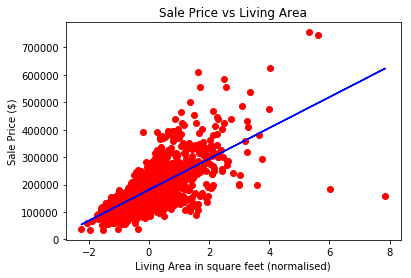

In [9]:
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
X = x[:,1]
Y = theta[1]*X + theta[0]
plt.plot(X, Y, '-r', color='blue')
annotation = ax.text(-1, 700000, '')
plt.show()

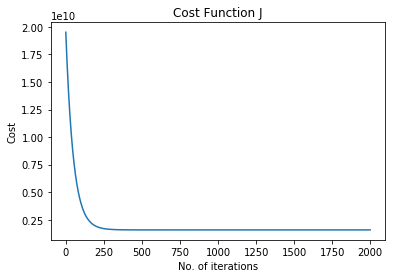

In [10]:
# Cost Function Plotted
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [11]:
# Animation

fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('Linear Regression.gif', writer='imagemagick', fps = 30)


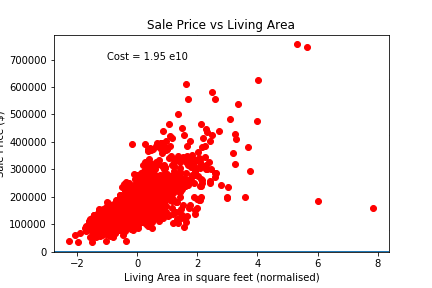

In [12]:
filename = 'Linear Regression.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))